In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the list of cities as coordinates (x, y)
cities = [(random.randint(0, 200), random.randint(0, 200)) for i in range(20)]

# Function to calculate the total distance of a path
def calculate_distance(path):
    total_distance = 0
    for i in range(len(path)):
        j = (i + 1) % len(path)  # Wrap around to the first city
        city_from, city_to = path[i], path[j]
        distance = np.sqrt((city_from[0] - city_to[0])**2 + (city_from[1] - city_to[1])**2)
        total_distance += distance
    return total_distance

# Generate the initial population of paths
def generate_population(size, cities):
    return [random.sample(cities, len(cities)) for _ in range(size)]

# Fitness function to evaluate each path (inverse of the total distance)
def fitness(path):
    return  1/calculate_distance(path)
 

In [2]:
# Selection process to choose the best paths for reproduction
def selection(population, fitness_scores, k=5):
    selected_indices = np.argsort(fitness_scores)[-k:] # Get indices of top-k paths
    return [population[i] for i in selected_indices]

In [3]:
# Crossover (recombination) operation to produce offspring
def crossover(parent1, parent2):
    cut_point1, cut_point2 = sorted(random.sample(range(len(parent1)), 2))
    child = [None]*len(parent1)
    
    # Insert the middle part from the first parent into the child
    middle_part = parent1[cut_point1:cut_point2]
    child[cut_point1:cut_point2] = middle_part

    # Fill the rest with the genes from the second parent without duplicates
    fill_pos = list(range(cut_point1)) + list(range(cut_point2, len(parent1)))
    for pos in fill_pos:
        for gene in parent2:
            if gene not in child:
                child[pos] = gene
                break
            
    return child

In [4]:
# Mutation operation to introduce variations
def mutate(path, mutation_rate=0.01):
    for i in range(len(path)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(path) - 1)
            path[i], path[j] = path[j], path[i] # Swap two cities
    return path


In [5]:
#Main genetic algorithm
def genetic_algorithm(cities, population_size=100, generations=1000, k=20, mutation_rate=0.01):
    population = generate_population(population_size, cities)
    best_distance = float('inf')
    best_path = None
    
    for generation in range(generations):
        fitness_scores = [fitness(path) for path in population]
        population = selection(population, fitness_scores, k)
    
        # Create the next generation
        next_generation = []
        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(population, 2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            next_generation.append(child)
    
        population = next_generation
        current_best = min(population, key=calculate_distance)
        current_best_distance = calculate_distance(current_best)
        if current_best_distance < best_distance:
            best_distance = current_best_distance
            best_path = current_best
            print(f"Generation {generation}: Best distance = {best_distance}")

    return best_path, best_distance


Generation 0: Best distance = 1659.3727573434674
Generation 1: Best distance = 1584.6852635074254
Generation 2: Best distance = 1482.1794106775665
Generation 3: Best distance = 1297.5119619276397
Generation 5: Best distance = 1219.5774779282413
Generation 7: Best distance = 1188.0183057984902
Generation 8: Best distance = 1184.862734938401
Generation 9: Best distance = 1084.1853787597997
Generation 11: Best distance = 982.0863807870436
Generation 13: Best distance = 962.7957654809848
Generation 14: Best distance = 929.358791240144
Generation 15: Best distance = 886.5559719802906
Generation 16: Best distance = 868.052523766615
Generation 17: Best distance = 850.2016023085635
Generation 18: Best distance = 827.7585760537336
Generation 19: Best distance = 806.4032873887893
Generation 23: Best distance = 800.4275484331545
Generation 27: Best distance = 797.2771417803635
Generation 29: Best distance = 790.2232382883897
Best path: [(187, 190), (148, 154), (154, 128), (177, 52), (193, 15), (1

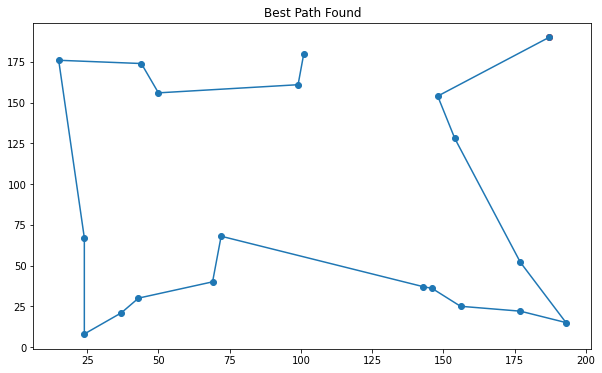

In [6]:
#Run the genetic algorithm
best_path, best_distance = genetic_algorithm(cities)
print(f"Best path: {best_path}\nBest distance: {best_distance}")

#Plot the best path
plt.figure(figsize=(10, 6))
x, y = zip(*best_path)
plt.plot(x, y, 'o-')
plt.scatter(x[0], y[0], color='red') # Starting city
plt.title('Best Path Found')
plt.show()